# 1. Introduction
In this part, we will create a dataframe that could be fed into a machine learning model and generate some predicted Metacritic scores.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

In [2]:
df = pd.read_csv('../Data/data5.csv')

# 2. Create Binary Columns For All Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10744 entries, 0 to 10743
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                10744 non-null  int64  
 1   id                  10744 non-null  int64  
 2   name                10744 non-null  object 
 3   released            10744 non-null  object 
 4   rating              10744 non-null  float64
 5   rating_top          10744 non-null  int64  
 6   ratings_count       10744 non-null  int64  
 7   reviews_text_count  10744 non-null  int64  
 8   added               10744 non-null  int64  
 9   metacritic          3299 non-null   float64
 10  playtime            10744 non-null  int64  
 11  suggestions_count   10744 non-null  int64  
 12  reviews_count       10744 non-null  int64  
 13  parent_platforms    10744 non-null  object 
 14  platforms           10740 non-null  object 
 15  ratings             10744 non-null  object 
 16  genr

These are the features that will be used:
- Platforms
- Genres
- Tags

Since they are all categorical data, they have to be converted into binary columns before inputting them since machine learning models could only accept numerical data.

Firstly, there shouldn't be any missing data in the feature columns, thus I will fill any missing entries with the string: `NA`:

In [4]:
# Processing null values by replacing it with 'NA'

df['genres'] = df['genres'].fillna('NA')
df['tags'] = df['tags'].fillna('NA')
df['platforms'] = df['platforms'].fillna('NA')

## 2.1 Platforms
The first feature column to process is `platforms`. Due to the large types of platforms present in this dataset, I will group those under the same family as a single unit.

In [5]:
# Group into family platforms to reduce sparsity
df['PlayStation'] = np.where(df['platforms'].str.contains(" PSP| PS_Vita| PlayStation| PlayStation_2| PlayStation_3| PlayStation_4| PlayStation_5|PSP|PS_Vita|PlayStation|PlayStation_2|PlayStation_3|PlayStation_4|PlayStation_5"), '1', '0')
df['Nintendo'] = np.where(df['platforms'].str.contains(" GameCube| Game_Boy| Game_Boy_Advance| Game_Boy_Color| NES| SNES| Wii| Wii_U| Nintendo_3DS| Nintendo_64| Nintendo_DS| Nintendo_DSi| Nintendo_Switch|GameCube|Game_Boy|Game_Boy_Advance|Game_Boy_Color|NES|SNES|Wii|Wii_U|Nintendo_3DS|Nintendo_64|Nintendo_DS|Nintendo_DSi|Nintendo_Switch"), '1', '0')
df['Xbox'] = np.where(df['platforms'].str.contains(" Xbox| Xbox_360| Xbox_One| Xbox_Series_X|Xbox|Xbox_360|Xbox_One|Xbox_Series_X"), '1', '0')
df['Sega'] = np.where(df['platforms'].str.contains(" Dreamcast| Game_Gear| Genesis| Jaguar| SEGA_32X| SEGA_CD| SEGA_Master_System| SEGA_Saturn|Dreamcast|Game_Gear|Genesis|Jaguar|SEGA_32X|SEGA_CD|SEGA_Master_System|SEGA_Saturn"), '1', '0')
df['Atari'] = np.where(df['platforms'].str.contains(" Atari_2600| Atari_5200| Atari_7800| Atari_8-bit| Atari_Flashback| Atari_Lynx| Atari_ST| Atari_XEGS|Atari_2600|Atari_5200|Atari_7800|Atari_8-bit|Atari_Flashback|Atari_Lynx|Atari_ST|Atari_XEGS"), '1', '0')
df['3DO'] = np.where(df['platforms'].str.contains(" 3DO|3DO"), '1', '0')
df['Android'] = np.where(df['platforms'].str.contains(" Android|Android"), '1', '0')
df['Apple_II'] = np.where(df['platforms'].str.contains(" Apple_II|Apple_II"), '1', '0')
df['Classic_Macintosh'] = np.where(df['platforms'].str.contains(" Classic_Macintosh|Classic_Macintosh"), '1', '0')
df['Commodore_/_Amiga'] = np.where(df['platforms'].str.contains(" Commodore_/_Amiga|Commodore_/_Amiga"), '1', '0')
df['Linux'] = np.where(df['platforms'].str.contains(" Linux|Linux"), '1', '0')
df['Neo_Geo'] = np.where(df['platforms'].str.contains(" Neo_Geo|Neo_Geo"), '1', '0')
df['PC'] = np.where(df['platforms'].str.contains(" PC|PC"), '1', '0')
df['Web'] = np.where(df['platforms'].str.contains(" Web|Web"), '1', '0')
df['iOS'] = np.where(df['platforms'].str.contains(" iOS|iOS"), '1', '0')
df['macOS'] = np.where(df['platforms'].str.contains(" macOS|macOS"), '1', '0')

## 2.2 Tags
The second feature column to process is `tags`. Due to the large amount of unique tags in this dataset, I will trim them down to the ones used in [Steam](https://store.steampowered.com/) instead.

In [7]:
# convert to string
df['tags'] = df['tags'].astype(str)
# add all unique tag values into a list
unique_tags = df['tags'].unique().tolist()

# sort the list
sorted(unique_tags)

["1980s, 1990's, 2D, Atmospheric, Comedy, Dark, Dragons, Family Friendly, Female Protagonist, Funny, Great Soundtrack, Lore-Rich, Magic, Medieval, Point & Click, Retro, Singleplayer, Story Rich, Stylized",
 "1980s, 1990's, 2D, Classic, Comedy, Pixel Graphics, Point & Click, Retro, Sci-fi, Singleplayer, Space, Third Person",
 "1980s, 1990's, 2D, Classic, Detective, Pixel Graphics, Point & Click, Retro, Singleplayer",
 "1980s, 1990's, 2D, Full controller support, Includes level editor, Steam Achievements, Steam Leaderboards, Atmospheric, Steam Workshop, Blood, Difficult, Fast-Paced, Gore, Great Soundtrack, Level Editor, Pixel Graphics, Retro, Singleplayer, Top-Down, Top-Down Shooter, Violent, controller support, overlay",
 "1980s, 1990's, Assassin, Valve Anti-Cheat enabled, Classic, Competitive, e-sports, First-Person, FPS, Military, Multiplayer, Ninja, PvP, Score Attack, Survival, Tactical, Team-Based",
 "1980s, 2D, Bullet Hell, Free to Play, Pixel Graphics, Retro, Sci-fi, Shoot 'Em Up,

There seems to be too many unique tags in this dataset. Hence, I will use the tags from [Steam](https://store.steampowered.com/tag/browse/#global_4305) and cross-check with the dataset to see if the entries contain any of the tags used by Steam. 

To extract out the Steam tags, I will use BeautifulSoup to scrap them. From inspecting the website, the target is a `div` with the `class`: `tag_browse_tags`:

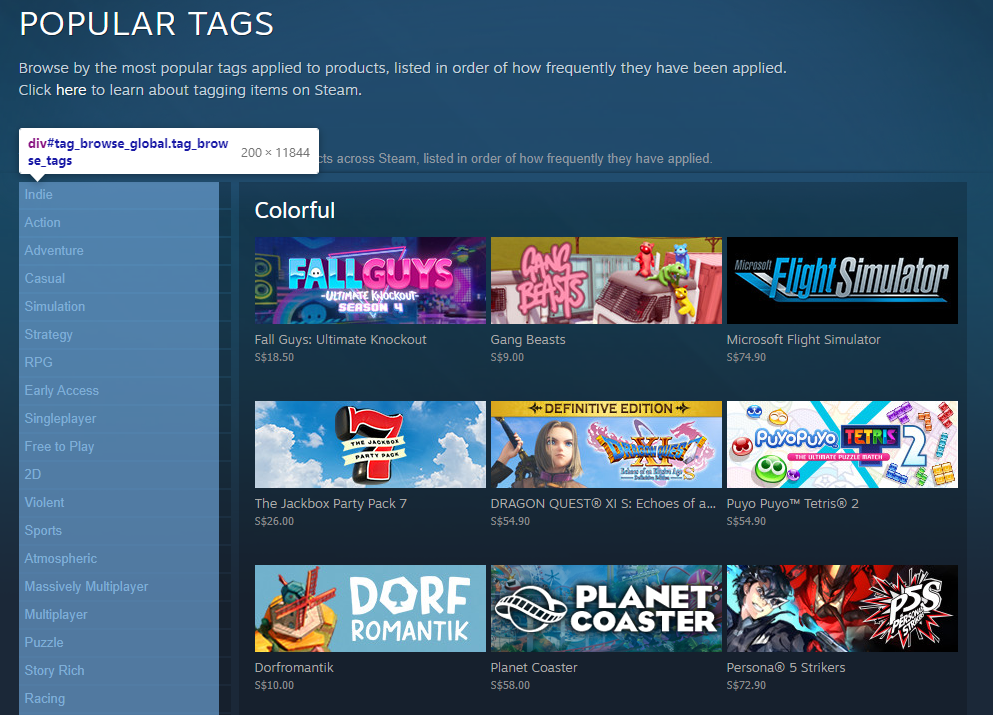

In [8]:
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup, Comment
url='https://store.steampowered.com/tag/browse/#global_4305'
content = urlopen(url).read()
soup = BeautifulSoup(content, "html.parser")
rows =soup.find_all('div',attrs={"class" : "tag_browse_tags"})

tag_list = []
for row in soup.find_all('div',attrs={"class" : "tag_browse_tags"}):
    print(row.text)
    tag_list.append(row.text)


tag_list


Indie
Action
Adventure
Casual
Simulation
Strategy
RPG
Early Access
Singleplayer
Free to Play
2D
Violent
Sports
Atmospheric
Massively Multiplayer
Multiplayer
Puzzle
Story Rich
Racing
Fantasy
Gore
Nudity
3D
Sexual Content
Colorful
Anime
Pixel Graphics
First-Person
Funny
Cute
Great Soundtrack
Exploration
Sci-fi
Shooter
Arcade
Horror
Retro
Family Friendly
Co-op
VR
Difficult
Open World
Platformer
Survival
Relaxing
Action-Adventure
Female Protagonist
Comedy
Third Person
FPS
Online Co-Op
Visual Novel
PvP
Combat
Stylized
Physics
Realistic
Choices Matter
Sandbox
Top-Down
Design & Illustration
Dark
Mystery
Utilities
Controller
Character Customization
Psychological Horror
Cartoony
Tactical
Space
Turn-Based
Local Multiplayer
Multiple Endings
Building
Point & Click
Minimalist
Management
Old School
Replay Value
2D Platformer
PvE
Education
Action RPG
Futuristic
Crafting
Magic
Side Scroller
Linear
Hand-drawn
Survival Horror
Mature
Puzzle Platformer
Procedural Generation
Local Co-Op
Zombies
Resource M

["\nIndie\nAction\nAdventure\nCasual\nSimulation\nStrategy\nRPG\nEarly Access\nSingleplayer\nFree to Play\n2D\nViolent\nSports\nAtmospheric\nMassively Multiplayer\nMultiplayer\nPuzzle\nStory Rich\nRacing\nFantasy\nGore\nNudity\n3D\nSexual Content\nColorful\nAnime\nPixel Graphics\nFirst-Person\nFunny\nCute\nGreat Soundtrack\nExploration\nSci-fi\nShooter\nArcade\nHorror\nRetro\nFamily Friendly\nCo-op\nVR\nDifficult\nOpen World\nPlatformer\nSurvival\nRelaxing\nAction-Adventure\nFemale Protagonist\nComedy\nThird Person\nFPS\nOnline Co-Op\nVisual Novel\nPvP\nCombat\nStylized\nPhysics\nRealistic\nChoices Matter\nSandbox\nTop-Down\nDesign & Illustration\nDark\nMystery\nUtilities\nController\nCharacter Customization\nPsychological Horror\nCartoony\nTactical\nSpace\nTurn-Based\nLocal Multiplayer\nMultiple Endings\nBuilding\nPoint & Click\nMinimalist\nManagement\nOld School\nReplay Value\n2D Platformer\nPvE\nEducation\nAction RPG\nFuturistic\nCrafting\nMagic\nSide Scroller\nLinear\nHand-drawn\nS

Clean the data:

In [9]:
# removes \n and replaces it with ,
tag_list2 = list(map(lambda x:x.replace("\n", ","),tag_list))

# splits entire string into multiple strings
newList = []
for element in tag_list2:
    newList.extend(element.split(','))

# check
print(newList)

['', 'Indie', 'Action', 'Adventure', 'Casual', 'Simulation', 'Strategy', 'RPG', 'Early Access', 'Singleplayer', 'Free to Play', '2D', 'Violent', 'Sports', 'Atmospheric', 'Massively Multiplayer', 'Multiplayer', 'Puzzle', 'Story Rich', 'Racing', 'Fantasy', 'Gore', 'Nudity', '3D', 'Sexual Content', 'Colorful', 'Anime', 'Pixel Graphics', 'First-Person', 'Funny', 'Cute', 'Great Soundtrack', 'Exploration', 'Sci-fi', 'Shooter', 'Arcade', 'Horror', 'Retro', 'Family Friendly', 'Co-op', 'VR', 'Difficult', 'Open World', 'Platformer', 'Survival', 'Relaxing', 'Action-Adventure', 'Female Protagonist', 'Comedy', 'Third Person', 'FPS', 'Online Co-Op', 'Visual Novel', 'PvP', 'Combat', 'Stylized', 'Physics', 'Realistic', 'Choices Matter', 'Sandbox', 'Top-Down', 'Design & Illustration', 'Dark', 'Mystery', 'Utilities', 'Controller', 'Character Customization', 'Psychological Horror', 'Cartoony', 'Tactical', 'Space', 'Turn-Based', 'Local Multiplayer', 'Multiple Endings', 'Building', 'Point & Click', 'Minima

In [10]:
# removes first and last elements (both are empty strings)
newList.pop(0)
newList.pop(-1)
newList

['Indie',
 'Action',
 'Adventure',
 'Casual',
 'Simulation',
 'Strategy',
 'RPG',
 'Early Access',
 'Singleplayer',
 'Free to Play',
 '2D',
 'Violent',
 'Sports',
 'Atmospheric',
 'Massively Multiplayer',
 'Multiplayer',
 'Puzzle',
 'Story Rich',
 'Racing',
 'Fantasy',
 'Gore',
 'Nudity',
 '3D',
 'Sexual Content',
 'Colorful',
 'Anime',
 'Pixel Graphics',
 'First-Person',
 'Funny',
 'Cute',
 'Great Soundtrack',
 'Exploration',
 'Sci-fi',
 'Shooter',
 'Arcade',
 'Horror',
 'Retro',
 'Family Friendly',
 'Co-op',
 'VR',
 'Difficult',
 'Open World',
 'Platformer',
 'Survival',
 'Relaxing',
 'Action-Adventure',
 'Female Protagonist',
 'Comedy',
 'Third Person',
 'FPS',
 'Online Co-Op',
 'Visual Novel',
 'PvP',
 'Combat',
 'Stylized',
 'Physics',
 'Realistic',
 'Choices Matter',
 'Sandbox',
 'Top-Down',
 'Design & Illustration',
 'Dark',
 'Mystery',
 'Utilities',
 'Controller',
 'Character Customization',
 'Psychological Horror',
 'Cartoony',
 'Tactical',
 'Space',
 'Turn-Based',
 'Local Mul

`fuzzywuzzy` is used to check if the dataset entries contain any of the Steam tags (`newList`). <br> In this case, if they match by at least 70%, the value of the newly-created column (named after the Steam tags) will be `1`, else `0`.

In [ ]:
# pip install fuzzywuzzy

In [6]:
from fuzzywuzzy import process, fuzz

C:\Users\user\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [11]:
# create binary columns from tag list
for col in newList:
    df[col] = df['tags'].apply(lambda x: 1 if fuzz.token_set_ratio(str(col), x) >= 70 else 0)

# check
df

,rank,id,name,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,...,Electronic,Motocross,Rock Music,ATV,Well-Written,8-bit Music,Skiing,Snowboarding,BMX,Reboot
0,1,25097,The Legend of Zelda: Ocarina of Time,1998-11-21,4.39,5,486,3,872,99.0,...,0,0,0,0,0,0,0,0,0,0
1,2,54751,Soulcalibur,1998-07-30,4.38,5,47,0,167,98.0,...,0,0,0,0,0,0,0,0,0,0
2,3,3498,Grand Theft Auto V,2013-09-17,4.48,5,3796,21,12383,97.0,...,0,0,0,0,0,0,0,0,0,0
3,4,22511,The Legend of Zelda: Breath of the Wild,2017-03-02,4.56,5,1711,25,3284,97.0,...,0,0,0,0,0,0,0,0,0,0
4,5,27036,Super Mario Galaxy 2,2010-05-23,4.37,5,222,2,420,97.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,10740,51427,Tekken (mobile),2017-08-18,2.67,4,4,2,5,NaN,...,0,0,0,0,0,0,0,0,0,0
10740,10741,31876,Bad Dudes,2018-03-21,3.17,3,6,0,5,NaN,...,0,0,0,0,0,0,0,0,0,0
10741,10742,387303,Ray Eager,2019-11-11,4.83,5,5,0,3,NaN,...,0,0,0,0,0,0,0,0,0,0
10742,10743,330541,Stalker Online,2019-10-15,2.83,3,5,0,3,NaN,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# iterating the columns to check
for col in df.columns: 
    print(col)

rank
id
name
released
rating
rating_top
ratings_count
reviews_text_count
added
metacritic
playtime
suggestions_count
reviews_count
parent_platforms
platforms
ratings
genres
tags
Year
PlayStation
Nintendo
Xbox
Sega
Atari
3DO
Android
Apple_II
Classic_Macintosh
Commodore_/_Amiga
Linux
Neo_Geo
PC
Web
iOS
macOS
Indie
Action
Adventure
Casual
Simulation
Strategy
RPG
Early Access
Singleplayer
Free to Play
2D
Violent
Sports
Atmospheric
Massively Multiplayer
Multiplayer
Puzzle
Story Rich
Racing
Fantasy
Gore
Nudity
3D
Sexual Content
Colorful
Anime
Pixel Graphics
First-Person
Funny
Cute
Great Soundtrack
Exploration
Sci-fi
Shooter
Arcade
Horror
Retro
Family Friendly
Co-op
VR
Difficult
Open World
Platformer
Survival
Relaxing
Action-Adventure
Female Protagonist
Comedy
Third Person
FPS
Online Co-Op
Visual Novel
PvP
Combat
Stylized
Physics
Realistic
Choices Matter
Sandbox
Top-Down
Design & Illustration
Dark
Mystery
Utilities
Controller
Character Customization
Psychological Horror
Cartoony
Tactical
Spac

Some of the tags actually contain the exact words as the genres! It would be better to remove such columns before processing the `genres` column to prevent any conflicting errors.

In [13]:
# get duplicate columns
genres_list = ['Action','Adventure','Arcade','Board Games','Card','Casual','Educational','Family','Fighting','Indie','Massively Multiplayer','Platformer','Puzzle','RPG','Racing','Shooter','Simulation','Sports','Strategy']
set(newList) & set(genres_list)

{'Action',
 'Adventure',
 'Arcade',
 'Casual',
 'Fighting',
 'Indie',
 'Massively Multiplayer',
 'Platformer',
 'Puzzle',
 'RPG',
 'Racing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [14]:
# remove duplicate columns
df.drop(['Action',
 'Adventure',
 'Arcade',
 'Casual',
 'Fighting',
 'Indie',
 'Massively Multiplayer',
 'Platformer',
 'Puzzle',
 'RPG',
 'Racing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'], axis = 1, inplace=True) 

## 2.3 Genres
The last feature column to process is `genres`. Just have to create a binary column for each genre.

In [15]:
df['genres'] = df['genres'].apply(lambda x: x.split(', '))

In [16]:
a1 = pd.get_dummies(df['genres'].explode()).sum(level=0)
df = df.join(a1, on=df.index, how='left')

df

,rank,id,name,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,...,Massively Multiplayer,NA,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,1,25097,The Legend of Zelda: Ocarina of Time,1998-11-21,4.39,5,486,3,872,99.0,...,0,0,0,0,1,0,0,0,0,0
1,2,54751,Soulcalibur,1998-07-30,4.38,5,47,0,167,98.0,...,0,0,0,0,0,0,0,0,0,0
2,3,3498,Grand Theft Auto V,2013-09-17,4.48,5,3796,21,12383,97.0,...,0,0,0,0,0,0,0,0,0,0
3,4,22511,The Legend of Zelda: Breath of the Wild,2017-03-02,4.56,5,1711,25,3284,97.0,...,0,0,0,0,1,0,0,0,0,0
4,5,27036,Super Mario Galaxy 2,2010-05-23,4.37,5,222,2,420,97.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10739,10740,51427,Tekken (mobile),2017-08-18,2.67,4,4,2,5,NaN,...,0,0,0,0,0,0,0,0,0,0
10740,10741,31876,Bad Dudes,2018-03-21,3.17,3,6,0,5,NaN,...,0,0,0,0,0,0,0,0,0,0
10741,10742,387303,Ray Eager,2019-11-11,4.83,5,5,0,3,NaN,...,1,0,0,0,0,0,0,0,0,0
10742,10743,330541,Stalker Online,2019-10-15,2.83,3,5,0,3,NaN,...,1,0,0,0,1,0,0,0,0,0


In [17]:
df.drop(['NA'], axis = 1, inplace=True)

In [19]:
df.to_csv('../Data/final_df.csv', index=False)

# 3. Create Training Set

In [20]:
from sklearn.model_selection import train_test_split

# Reserve 20% of data to test set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
train_set.head()

,rank,id,name,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
353,354,292842,The Legend of Zelda: Link's Awakening (2019),2019-09-20,4.41,5,234,4,813,87.0,...,0,0,0,0,1,0,0,0,0,0
456,457,864,Dishonored 2,2016-11-10,4.26,4,1076,3,4617,86.0,...,0,0,0,0,1,0,0,0,0,0
10348,10349,25850,Rune Factory: Frontier,2009-03-17,4.25,4,8,0,15,NaN,...,0,0,0,0,0,0,0,0,0,0
239,240,23875,Xenoblade Chronicles,2010-06-10,4.33,5,88,1,192,89.0,...,0,0,0,0,1,0,0,0,0,0
6884,6885,244732,Tony Hawk's Project 8,2006-11-07,3.26,4,27,0,136,NaN,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# keep only features and label
train_set.drop([
'name',
'rank',
'id',
'released',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'playtime',
'suggestions_count',
'reviews_count',
'parent_platforms',
'platforms',
'ratings',
'genres',
'tags',
'Year'], axis = 1, inplace=True) 

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
# check
train_set.head()

,metacritic,PlayStation,Nintendo,Xbox,Sega,Atari,3DO,Android,Apple_II,Classic_Macintosh,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
353,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
456,86.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10348,NaN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,89.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6884,NaN,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# check
for col in train_set.columns: 
    print(col)

metacritic
PlayStation
Nintendo
Xbox
Sega
Atari
3DO
Android
Apple_II
Classic_Macintosh
Commodore_/_Amiga
Linux
Neo_Geo
PC
Web
iOS
macOS
Early Access
Singleplayer
Free to Play
2D
Violent
Atmospheric
Multiplayer
Story Rich
Fantasy
Gore
Nudity
3D
Sexual Content
Colorful
Anime
Pixel Graphics
First-Person
Funny
Cute
Great Soundtrack
Exploration
Sci-fi
Horror
Retro
Family Friendly
Co-op
VR
Difficult
Open World
Survival
Relaxing
Action-Adventure
Female Protagonist
Comedy
Third Person
FPS
Online Co-Op
Visual Novel
PvP
Combat
Stylized
Physics
Realistic
Choices Matter
Sandbox
Top-Down
Design & Illustration
Dark
Mystery
Utilities
Controller
Character Customization
Psychological Horror
Cartoony
Tactical
Space
Turn-Based
Local Multiplayer
Multiple Endings
Building
Point & Click
Minimalist
Management
Old School
Replay Value
2D Platformer
PvE
Education
Action RPG
Futuristic
Crafting
Magic
Side Scroller
Linear
Hand-drawn
Survival Horror
Mature
Puzzle Platformer
Procedural Generation
Local Co-Op
Zombie

In [25]:
# remove missing values
train_set.dropna(axis=0, inplace=True)

<ipython-input-25-8087ddc2ebf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.dropna(axis=0, inplace=True)


In [26]:
train_set.to_csv('../Data/train_set.csv', index=False)

# 4. Create Test Set

In [58]:
# reset test set
from sklearn.model_selection import train_test_split

# Reserve 20% of data to test set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [59]:
test_set.head()

,rank,id,name,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
8214,8215,24151,Metroid II - Return of Samus,1991-11-01,3.79,4,23,1,66,NaN,...,0,0,1,0,0,0,0,0,0,0
8882,8883,54172,SimCity,1989-01-01,3.86,4,14,0,41,NaN,...,0,0,0,0,0,0,0,1,0,0
4091,4092,14265,12 Labours of Hercules II: The Cretan Bull,2014-12-04,2.70,3,40,0,576,NaN,...,0,0,0,0,0,0,0,0,0,1
10334,10335,31055,Dave Mirra Freestyle BMX,2000-01-01,3.67,4,6,0,15,NaN,...,0,0,0,0,0,1,0,0,1,0
9970,9971,55887,Prehistorik 2 (1993),1993-01-01,3.83,4,12,0,19,NaN,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# keep only features and label
test_set.drop([
'name',
'rank',
'id',
'released',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'playtime',
'suggestions_count',
'reviews_count',
'parent_platforms',
'platforms',
'ratings',
'genres',
'tags',
'Year'], axis = 1, inplace=True) 

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
test_set

,metacritic,PlayStation,Nintendo,Xbox,Sega,Atari,3DO,Android,Apple_II,Classic_Macintosh,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
8214,NaN,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8882,NaN,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4091,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10334,NaN,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9970,NaN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,NaN,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5666,NaN,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2960,61.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5425,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
test_set.dropna(axis=0, inplace=True)

<ipython-input-62-0f02921997c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.dropna(axis=0, inplace=True)


In [63]:
test_set.to_csv('../Data/test_set.csv', index=False)

# 6. Simple Test with Logistic Regression
## 6.1 Set Up

In [65]:
# Metric
from sklearn.metrics import mean_squared_error

In [66]:
x_test = test_set.drop("metacritic", axis=1) # drop labels for training set
y_test = test_set["metacritic"].copy() # y variable

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(data, data_labels)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 6.2 Make Predictions

In [71]:
# Metric
from sklearn.metrics import mean_squared_error

# How did model perform?
data_predictions = logreg.predict(data)

# mean_square_error(actual value, predicted value)
log_mse = mean_squared_error(data_labels, data_predictions)
log_rmse = np.sqrt(log_mse)
print("RMSE for training set: " + str(log_rmse))

RMSE for training set: 8.459290240524867


In [72]:
# Metric
from sklearn.metrics import mean_squared_error

# How did model perform?
data_predictions = logreg.predict(x_test)

# mean_square_error(actual value, predicted value)
log_mse = mean_squared_error(y_test, data_predictions)
log_rmse = np.sqrt(log_mse)
print("RMSE for test set: " + str(log_rmse))

RMSE for test set: 11.178294516279436


There is a need to re-create the `test_set` since the imported one no longer has a `name` column.

In [92]:
from sklearn.model_selection import train_test_split

# re-create test_set to retrieve back the name list
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
test_set.drop([
'rank',
'id',
'released',
'rating',
'rating_top',
'ratings_count',
'reviews_text_count',
'added',
'playtime',
'suggestions_count',
'reviews_count',
'parent_platforms',
'platforms',
'ratings',
'genres',
'tags',
'Year'], axis = 1, inplace=True) 
test_set.dropna(inplace=True)


# Create new df
final_data = pd.DataFrame({'Game Title':test_set['name'], 'Predicted Metacritic Score':data_predictions}).set_index('Game Title')
display(final_data)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-92-33a9518f6263>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.dropna(inplace=True)


,Predicted Metacritic Score
Game Title,
Resident Evil Outbreak: File 2,74.0
MASSIVE CHALICE,73.0
Fahrenheit (Indigo Prophecy),72.0
Dragon Age: Origins - Ultimate Edition,61.0
Stories: The Path of Destinies,73.0
...,...
Left 4 Dead 2,58.0
Ice Age 3 Dawn of the Dinosaurs,74.0
SOMA,76.0


# 6.3 Create Result Dataframe
Include this new results dataframe into the test set:

In [93]:
merged = pd.merge(final_data, df, left_on='Game Title', right_on='name', how='left')
merged.head()

,Predicted Metacritic Score,rank,id,name,released,rating,rating_top,ratings_count,reviews_text_count,added,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,74.0,3071,59208,Resident Evil Outbreak: File 2,2004-09-09,4.00,4,13,0,33,...,0,0,0,0,0,0,0,0,0,0
1,73.0,2056,1743,MASSIVE CHALICE,2015-05-31,3.17,3,102,0,1023,...,1,0,0,0,0,0,0,0,0,1
2,72.0,484,22828,Fahrenheit (Indigo Prophecy),2005-09-16,4.25,5,268,0,623,...,0,0,0,0,0,0,0,0,0,0
3,61.0,305,366885,Dragon Age: Origins - Ultimate Edition,2010-10-29,4.37,5,270,0,1005,...,0,0,0,0,1,0,0,0,0,0
4,73.0,1955,2559,Stories: The Path of Destinies,2016-04-11,3.23,4,384,0,2860,...,1,0,1,0,1,0,0,0,0,0


Calculate some errors:

In [94]:
merged['relative_error'] = merged['metacritic'] - merged['Predicted Metacritic Score']
merged['absolute_error'] = abs(merged['metacritic'] - merged['Predicted Metacritic Score'])

# final results dataframe
results = merged.copy()
results = results[['name', 'metacritic', 'Predicted Metacritic Score', 'absolute_error', 'relative_error']]
display(results)

,name,metacritic,Predicted Metacritic Score,absolute_error,relative_error
0,Resident Evil Outbreak: File 2,58.0,74.0,16.0,-16.0
1,MASSIVE CHALICE,73.0,73.0,0.0,0.0
2,Fahrenheit (Indigo Prophecy),85.0,72.0,13.0,13.0
3,Dragon Age: Origins - Ultimate Edition,88.0,61.0,27.0,27.0
4,Stories: The Path of Destinies,74.0,73.0,1.0,1.0
...,...,...,...,...,...
651,Left 4 Dead 2,89.0,58.0,31.0,31.0
652,Ice Age 3 Dawn of the Dinosaurs,59.0,74.0,15.0,-15.0
653,SOMA,84.0,76.0,8.0,8.0
654,Danger Zone,64.0,72.0,8.0,-8.0


## 6.4 Graphical Plot of Actual Scores VS Predicted Scores

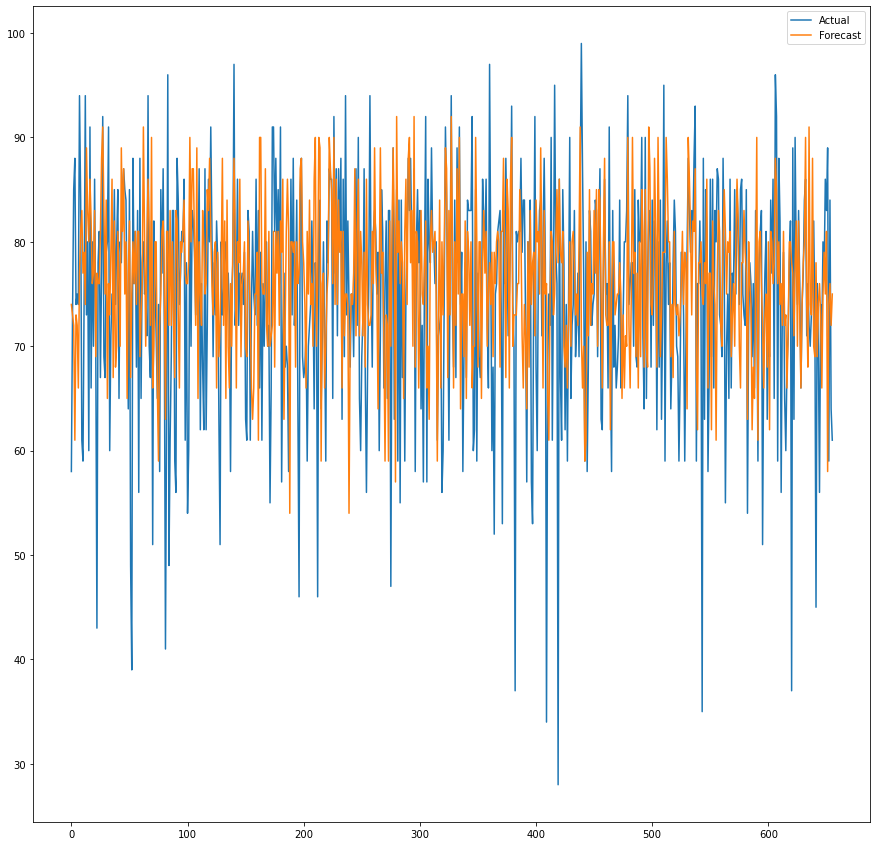

In [95]:
#for graphing
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.plot(results['metacritic'],label='Actual')
plt.plot(results['Predicted Metacritic Score'],label='Forecast')
plt.legend()

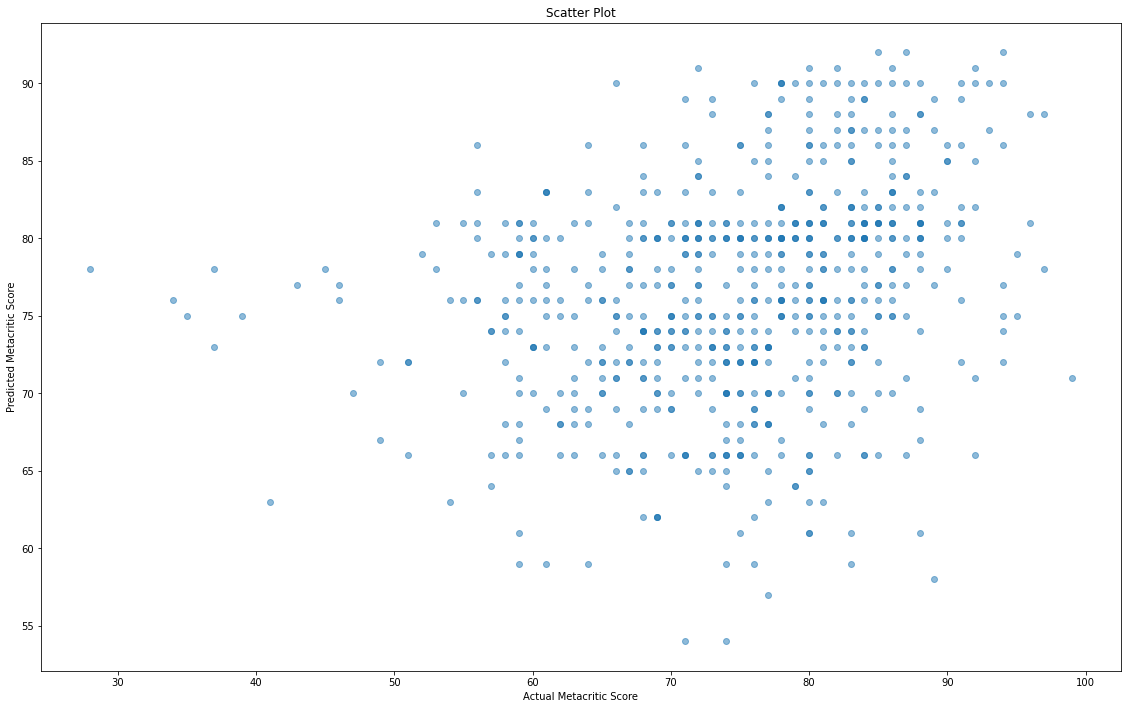

In [96]:
#for graphing
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,9))
ax=fig.add_axes([0,0,1,1])
ax.scatter(results['metacritic'], results['Predicted Metacritic Score'], alpha=0.5)
ax.set_xlabel('Actual Metacritic Score')
ax.set_ylabel('Predicted Metacritic Score')
ax.set_title('Scatter Plot')
plt.show()

In [97]:
results.to_csv('../Predicted Scores/results_simple.csv')

In [98]:
results = pd.read_csv('../Predicted Scores/results_simple.csv')
results['absolute_error'].mean()

8.509146341463415